In [1]:
import math

def f(t):
    return 2 / (math.atan(t/2)+2)

In [2]:
def explicit(x0: float, y0: float, tau: float, pointsCnt: int, f) -> tuple:
    res = {x0: y0}
    meanErr = 0
    lastX, lastY = x0, y0
    for i in range(1, pointsCnt):
        x = lastX+tau
        y = lastY -tau*lastY
        res[x] = y
        meanErr += abs(1-y/f(x))
        lastX, lastY = x, y
    return res, meanErr/(pointsCnt-1)

In [3]:
def implicit(x0: float, y0: float, tau: float, pointsCnt: int, f) -> tuple:
    res = {x0: y0}
    meanErr = 0
    lastX, lastY = x0, y0
    for i in range(1, pointsCnt):
        x = lastX+tau
        y = lastY/(tau+1)
        res[x] = y
        meanErr += abs(1-y/f(x))
        lastX, lastY = x, y
    return res, meanErr/(pointsCnt-1)

In [4]:
def weighted(x0: float, y0: float, tau: float, pointsCnt: int, f)-> tuple:
    res = {x0: y0}
    meanErr = 0
    lastX, lastY = x0, y0
    for i in range(1, pointsCnt):
        x = lastX+tau
        y = (2-tau)/(2+tau)*lastY
        res[x] = y
        meanErr += abs(1-y/f(x))
        lastX, lastY = x, y
    return res, meanErr/(pointsCnt-1)

In [5]:
def implicitMod(x0: float, y0: float, tau: float, pointsCnt: int, f) -> tuple:
    res = {x0: y0}
    meanErr = 0
    lastX, lastY = x0, y0
    for i in range(1, pointsCnt):
        x = lastX+tau
        y = (-1+math.sqrt(1+4*tau*lastY))/(2*tau)
        res[x] = y
        meanErr += abs(1-y/f(x))
        lastX, lastY = x, y
    return res, meanErr/(pointsCnt-1)

In [6]:
def error(y0, yMeth) -> float:
    return abs((y0-yMeth)/y0)

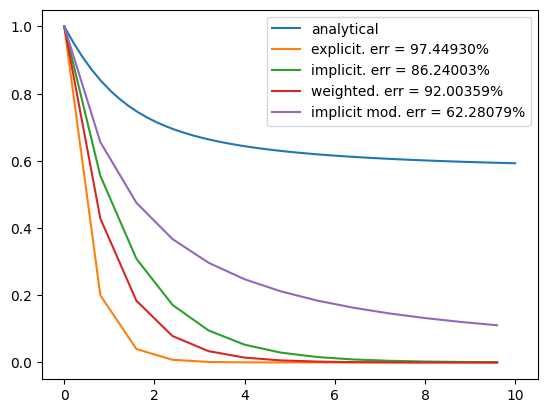

In [12]:
import matplotlib.pyplot as plt
import numpy as np

tau = 0.8
x0 = 0
y0 = 1
leftXBound = x0
rightXBoud = leftXBound + 10
pointsCount = int((rightXBoud-leftXBound)/tau)+1

midX = (rightXBoud-leftXBound)/2 + leftXBound

fig, ax = plt.subplots()
x = np.linspace(leftXBound, rightXBoud)

analytical = [f(t) for t in x]
expl, explErr = explicit(x0, y0, tau, pointsCount, f)
impl, implErr = implicit(x0, y0, tau, pointsCount, f)
wgt, wgtErr = weighted(x0, y0, tau, pointsCount, f)
impliMod, impliModErr = implicitMod(x0, y0, tau, pointsCount, f)

ax.plot(x, analytical, label='analytical')
ax.plot([x for x in expl], [expl[x] for x in expl], label=f'explicit. err = {format(explErr*100, '.5f')}%')
ax.plot([x for x in impl], [impl[x] for x in impl], label=f'implicit. err = {format(implErr*100, '.5f')}%')
ax.plot([x for x in wgt], [wgt[x] for x in wgt], label=f'weighted. err = {format(wgtErr*100, '.5f')}%')
ax.plot([x for x in impliMod], [impliMod[x] for x in impliMod], label=f'implicit mod. err = {format(impliModErr*100, '.5f')}%')

plt.legend()
plt.show()

In [8]:
print(f(2))

0.7180301998765338
